<a href="https://colab.research.google.com/github/am28012/Hands_on_project/blob/main/BMW_sales_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr


In [2]:
df = pd.read_csv('/content/bmw_sales.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  float64
 8    Price_USD            50000 non-null  object 
 9   Sales_Volume          50000 non-null  float64
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [3]:
# convert Price_USD from object to float64
df[' Price_USD '] = df[' Price_USD '].astype(str).str.replace('[$,]', '', regex=True).astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  float64
 8    Price_USD            50000 non-null  float64
 9   Sales_Volume          50000 non-null  float64
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 4.2+ MB


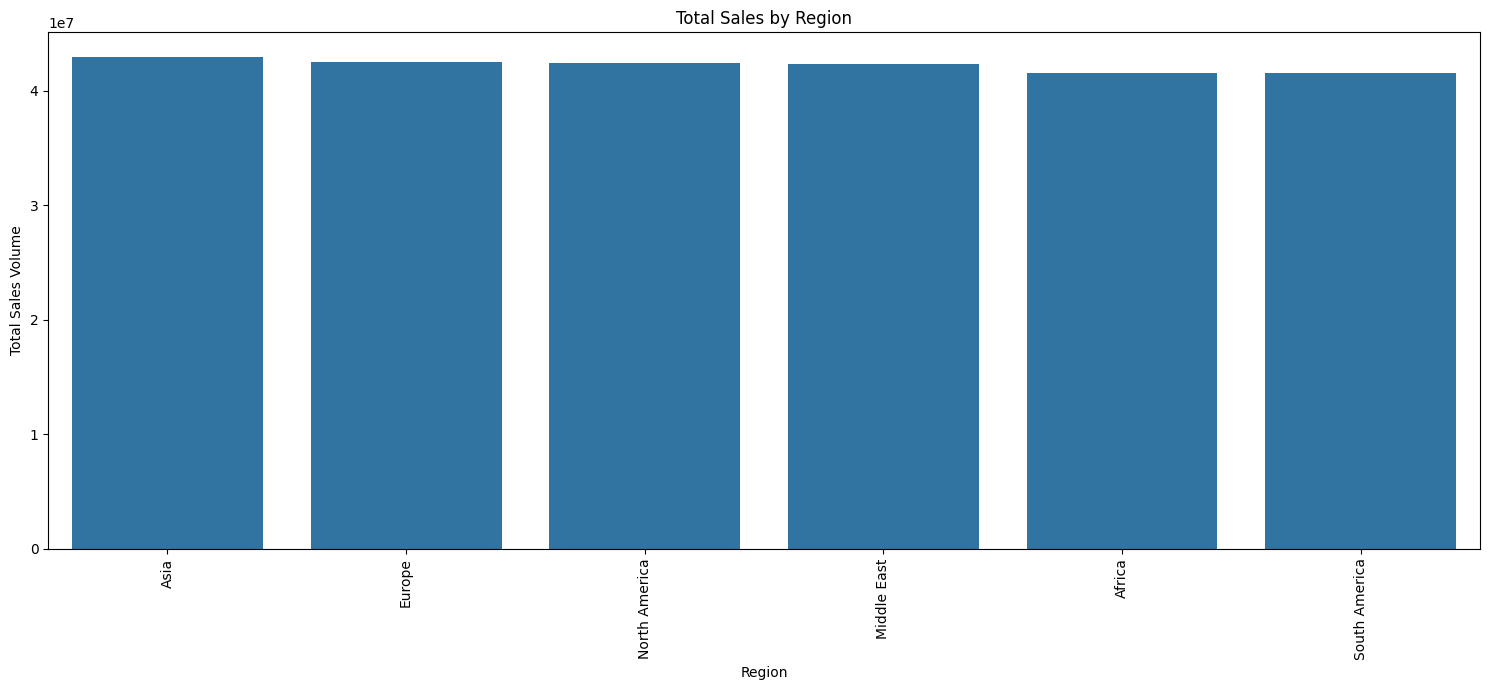

In [ ]:
# creation of distribution of sales on the basis of region

# Group by Region and calculate the sum of sales volume
region_sales = df.groupby('Region')['Sales_Volume'].sum().reset_index()

# Sort by total sales in descending order
region_sales = region_sales.sort_values(by='Sales_Volume', ascending=False)

# Create a bar plot of total sales by region
plt.figure(figsize=(15, 7))
sns.barplot(x='Region', y='Sales_Volume', data=region_sales)
plt.xticks(rotation=90)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales Volume')
plt.tight_layout()
plt.show()

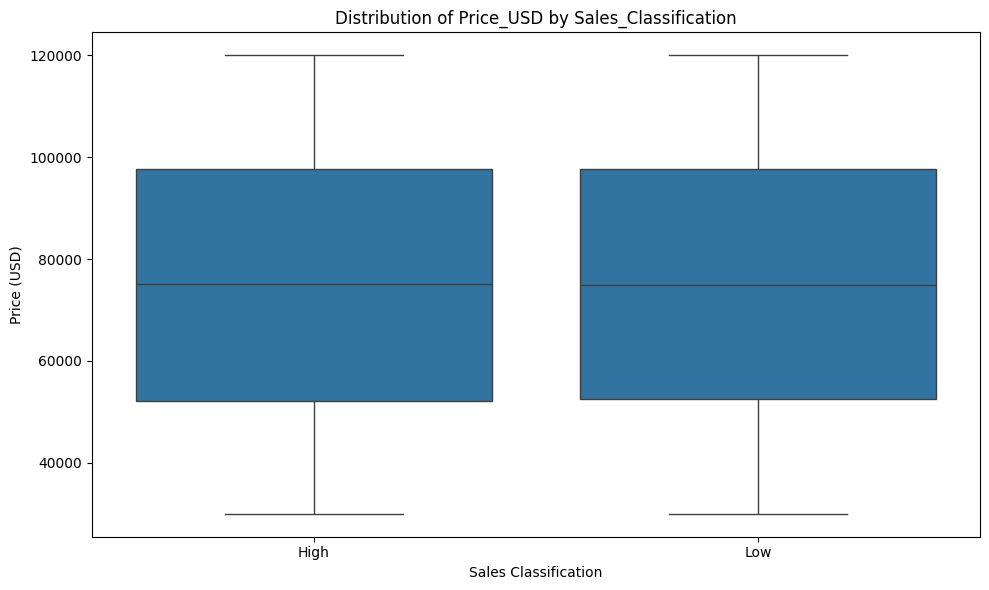

In [ ]:
# Boxplot showing Price_USD and Sales_Classification
plt.figure(figsize=(10,6))
sns.boxplot(x = 'Sales_Classification' , y = ' Price_USD ' , data = df)
plt.title('Distribution of Price_USD by Sales_Classification')
plt.xlabel('Sales Classification')
plt.ylabel('Price (USD)')
plt.tight_layout()
plt.show()

In [ ]:
# chi square test on  'Sales_Classification' & 'Transmission'

# Contingency table
contingency_table = pd.crosstab(df['Sales_Classification'], df['Transmission'])
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square test
chi2, p, dof, expected = scipy.stats.chi2_contingency(contingency_table)

print(f"\nChi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

# Interpret the results
alpha = 0.05
print(f"\nSignificance level (alpha): {alpha}")
if p < alpha:
  print("Result: Reject the null hypothesis. There is a significant association between Sales_Classification and Transmission.")
else:
  print("Result: Fail to reject the null hypothesis. There is no significant association between Sales_Classification and Transmission.")

Contingency Table:
Transmission          Automatic  Manual
Sales_Classification                   
High                       7595    7651
Low                       17251   17503

Chi-Square Statistic: 0.12859970965652814
P-value: 0.7198883487108411
Degrees of Freedom: 1
Expected Frequencies Table:
Transmission            Automatic       Manual
Sales_Classification                          
High                   7576.04232   7669.95768
Low                   17269.95768  17484.04232

Significance level (alpha): 0.05
Result: Fail to reject the null hypothesis. There is no significant association between Sales_Classification and Transmission.


In [ ]:
#chi square test for Model & Sales_Classification
#Contingency table
contingency_table = pd.crosstab(df['Model'], df['Sales_Classification'])
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square test
chi2, p, dof, expected = scipy.stats.chi2_contingency(contingency_table)

Contingency Table:
Sales_Classification  High   Low
Model                           
3 Series              1406  3189
5 Series              1397  3195
7 Series              1437  3229
M3                    1363  3050
M5                    1355  3123
X1                    1390  3180
X3                    1378  3119
X5                    1378  3109
X6                    1356  3122
i3                    1363  3255
i8                    1423  3183


In [ ]:
print(f"\nChi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))
# Interpret the results
alpha = 0.05
print(f"\nSignificance level (alpha): {alpha}")
if p < alpha:
  print("Result: Reject the null hypothesis. There is a significant association between Model & Sales_Classification ")
else:
  print("Result: Fail to reject the null hypothesis. There is no significant association between Model & Sales_Classification")


Chi-Square Statistic: 3.3661166720929456
P-value: 0.9714499333134624
Degrees of Freedom: 10
Expected Frequencies Table:
Sales_Classification        High         Low
Model                                       
3 Series              1401.10740  3193.89260
5 Series              1400.19264  3191.80736
7 Series              1422.75672  3243.24328
M3                    1345.61196  3067.38804
M5                    1365.43176  3112.56824
X1                    1393.48440  3176.51560
X3                    1371.22524  3125.77476
X5                    1368.17604  3118.82396
X6                    1365.43176  3112.56824
i3                    1408.12056  3209.87944
i8                    1404.46152  3201.53848

Significance level (alpha): 0.05
Result: Fail to reject the null hypothesis. There is no significant association between Model & Sales_Classification


                            OLS Regression Results                            
Dep. Variable:              Price_USD   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7361
Date:                Wed, 23 Jul 2025   Prob (F-statistic):              0.530
Time:                        07:21:47   Log-Likelihood:            -5.7923e+05
No. Observations:               50000   AIC:                         1.158e+06
Df Residuals:                   49996   BIC:                         1.159e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              7.508e+

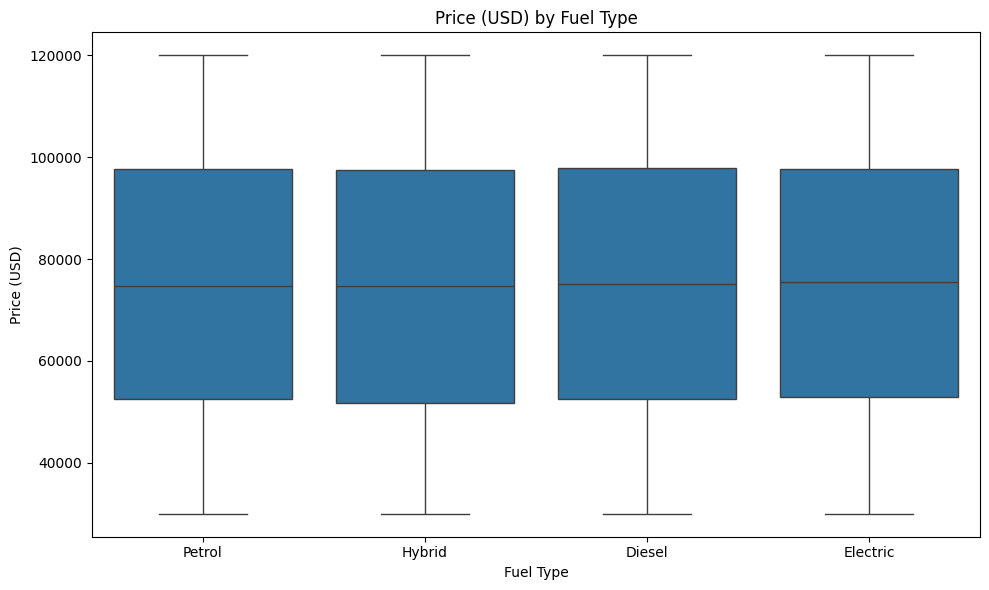

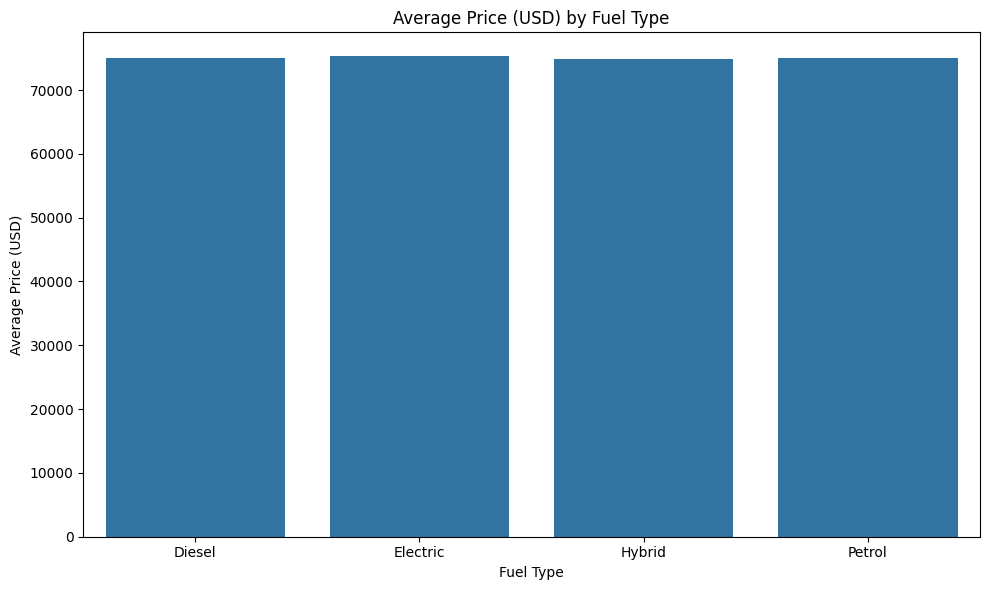

In [21]:

df_renamed = df.rename(columns={' Price_USD ': 'Price_USD'})

# linear regression
model = ols('Price_USD ~ Fuel_Type', data=df_renamed).fit()
print(model.summary())

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Price_USD', data=df_renamed)
plt.title('Price (USD) by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price (USD)')
plt.tight_layout()
plt.show()


mean_price_by_fuel = df_renamed.groupby('Fuel_Type')['Price_USD'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Fuel_Type', y='Price_USD', data=mean_price_by_fuel)
plt.title('Average Price (USD) by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price (USD)')
plt.tight_layout()
plt.show()


One-Way ANOVA results for Price_USD by Model:
                sum_sq       df         F    PR(>F)
Model     7.587597e+09     10.0  1.122604  0.340208
Residual  3.378718e+13  49989.0       NaN       NaN

Significance level (alpha): 0.05
Result: Fail to reject the null hypothesis. There is no significant difference in mean Price_USD across different Models.


/tmp/ipython-input-55-2291105534.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  anova_p_value = anova_table['PR(>F)'][0]


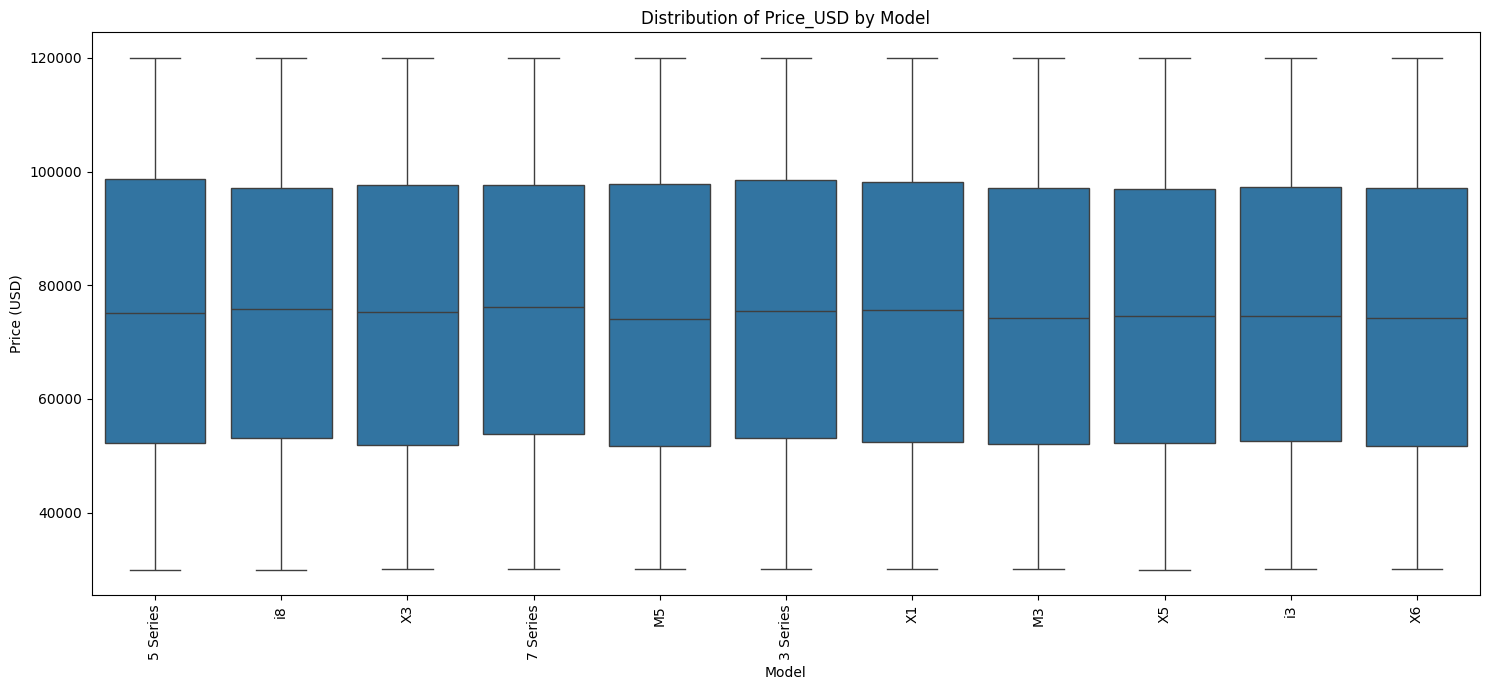

In [ ]:

df_anova = df.rename(columns={' Price_USD ': 'Price_USD'})

# Perform one-way ANOVA
model = ols('Price_USD ~ Model', data=df_anova).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nOne-Way ANOVA results for Price_USD by Model:")
print(anova_table)

# ANOVA results
alpha = 0.05
anova_p_value = anova_table['PR(>F)'][0]
print(f"\nSignificance level (alpha): {alpha}")
if anova_p_value < alpha:
  print("Result: Reject the null hypothesis. There is a significant difference in mean Price_USD across different Models.")
else:
  print("Result: Fail to reject the null hypothesis. There is no significant difference in mean Price_USD across different Models.")

#  Visualize the distribution using boxplots
plt.figure(figsize=(15, 7))
sns.boxplot(x='Model', y='Price_USD', data=df_anova)
plt.xticks(rotation=90)
plt.title('Distribution of Price_USD by Model')
plt.xlabel('Model')
plt.ylabel('Price (USD)')
plt.tight_layout()
plt.show()

Region
Asia             8454
Middle East      8373
North America    8335
Europe           8334
Africa           8253
South America    8251
Name: count, dtype: int64
Fuel_Type
Hybrid      12716
Petrol      12550
Electric    12471
Diesel      12263
Name: count, dtype: int64
50000
Region         Fuel_Type
Africa         Diesel       2018
               Electric     2067
               Hybrid       2092
               Petrol       2076
Asia           Diesel       2071
               Electric     2047
               Hybrid       2234
               Petrol       2102
Europe         Diesel       2050
               Electric     2101
               Hybrid       2124
               Petrol       2059
Middle East    Diesel       2069
               Electric     2046
               Hybrid       2103
               Petrol       2155
North America  Diesel       2012
               Electric     2128
               Hybrid       2130
               Petrol       2065
South America  Diesel       2043
   

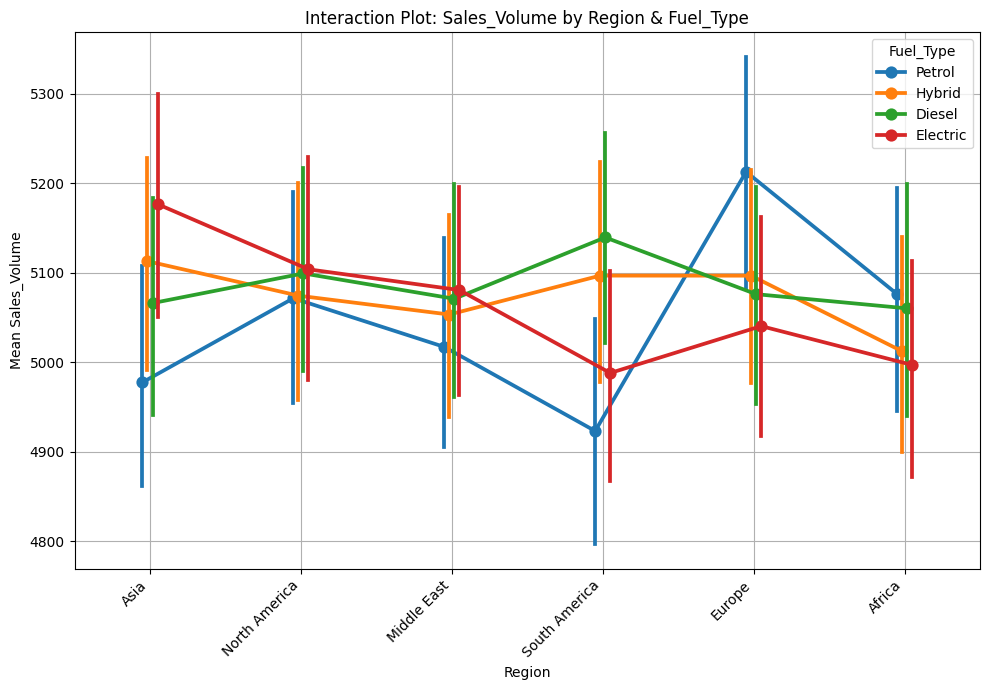

In [ ]:
#two way ANOVA for Sales_Volume , Region , Fuel_Type
print(df['Region'].value_counts())
print(df['Fuel_Type'].value_counts())
df_anova_2way = df[['Sales_Volume', 'Region','Fuel_Type']].dropna()
print(len(df_anova_2way))
print(df_anova_2way.groupby(['Region', 'Fuel_Type']).size()) # Group by Region and Fuel_Type to see counts for each combination
model_2way = ols('Sales_Volume ~ C(Region) + C(Fuel_Type) + C(Region):C(Fuel_Type)', data=df_anova_2way).fit()
anova_table_2way = sm.stats.anova_lm(model_2way, typ=2)
print("\nTwo-Way ANOVA results for Sales_Volume:")
print(anova_table_2way)
alpha = 0.05
print("\nInterpretation:")
if anova_table_2way['PR(>F)']['C(Region)'] < alpha:
    print("The main effect of Region on Sales_Volume is statistically significant.")
else:
    print("The main effect of Region on Sales_Volume is not statistically significant.")

if anova_table_2way['PR(>F)']['C(Fuel_Type)'] < alpha:
    print("The main effect of Fuel_Type on Sales_Volume is statistically significant.")
else:
    print("The main effect of Fuel_Type on Sales_Volume is not statistically significant.")

if anova_table_2way['PR(>F)']['C(Region):C(Fuel_Type)'] < alpha:
    print("The interaction effect between Region and Fuel_Type on Sales_Volume is statistically significant.")
    print("This means the effect of one factor depends on the level of the other.")
else:
    print("The interaction effect between Region and Fuel_Type on Sales_Volume is not statistically significant.")
    print("This suggests the effects of the two factors are independent or additive.")
plt.figure(figsize=(10, 7))
sns.pointplot(data=df_anova_2way, x='Region', y='Sales_Volume', hue='Fuel_Type', dodge=True, errorbar=('ci', 95)) # Changed errorbar format
plt.title('Interaction Plot: Sales_Volume by Region & Fuel_Type')
plt.xlabel('Region')
plt.ylabel('Mean Sales_Volume')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Pearson Correlation Coefficient between Sales_Volume and Engine_Size_L: -0.003941665105654886
P-value: 0.37812056526916027

Significance level (alpha): 0.05
Result: Fail to reject the null hypothesis. There is no statistically significant linear relationship between Sales_Volume and Engine_Size_L.


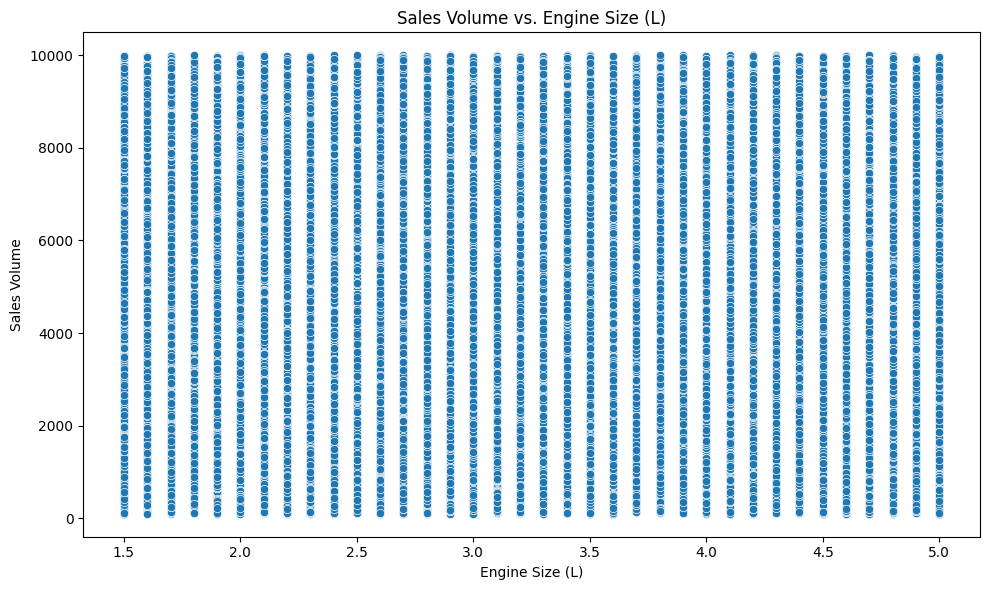

In [8]:
# Pearson Coefficient test for Sales_Volume & Engine_Size_L


correlation_coefficient, p_value = pearsonr(df['Sales_Volume'], df['Engine_Size_L'])

print(f"Pearson Correlation Coefficient between Sales_Volume and Engine_Size_L: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
print(f"\nSignificance level (alpha): {alpha}")

if p_value < alpha:
  print("Result: Reject the null hypothesis. There is a statistically significant linear relationship between Sales_Volume and Engine_Size_L.")
else:
  print("Result: Fail to reject the null hypothesis. There is no statistically significant linear relationship between Sales_Volume and Engine_Size_L.")

# You can also visualize the relationship with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine_Size_L', y='Sales_Volume', data=df)
plt.title('Sales Volume vs. Engine Size (L)')
plt.xlabel('Engine Size (L)')
plt.ylabel('Sales Volume')
plt.tight_layout()
plt.show()

In [13]:
#Pearson Coefficient test for Price_USD   & Sales_Volume
correlation_coefficient, p_value = pearsonr(df[' Price_USD '], df['Sales_Volume'])

print(f"Pearson Correlation Coefficient between Price_USD and Sales_Volume: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
print(f"\nSignificance level (alpha): {alpha}")

if p_value < alpha:
  print("Result: Reject the null hypothesis. There is a statistically significant linear relationship between Price_USD and Sales_Volume.")
else:
  print("Result: Fail to reject the null hypothesis. There is no statistically significant linear relationship between Price_USD and Sales_Volume.")



Pearson Correlation Coefficient between Price_USD and Sales_Volume: 7.956326467984699e-05
P-value: 0.9858060296664118

Significance level (alpha): 0.05
Result: Fail to reject the null hypothesis. There is no statistically significant linear relationship between Price_USD and Sales_Volume.


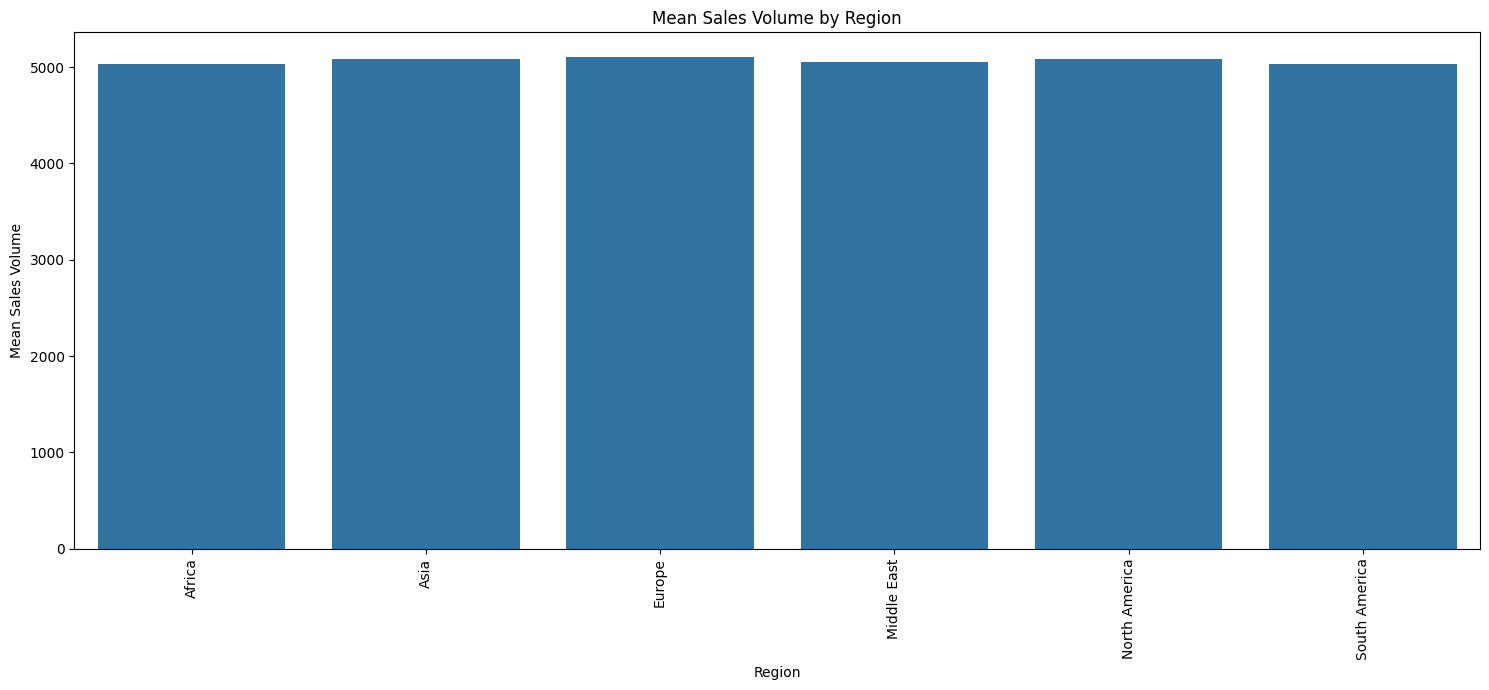

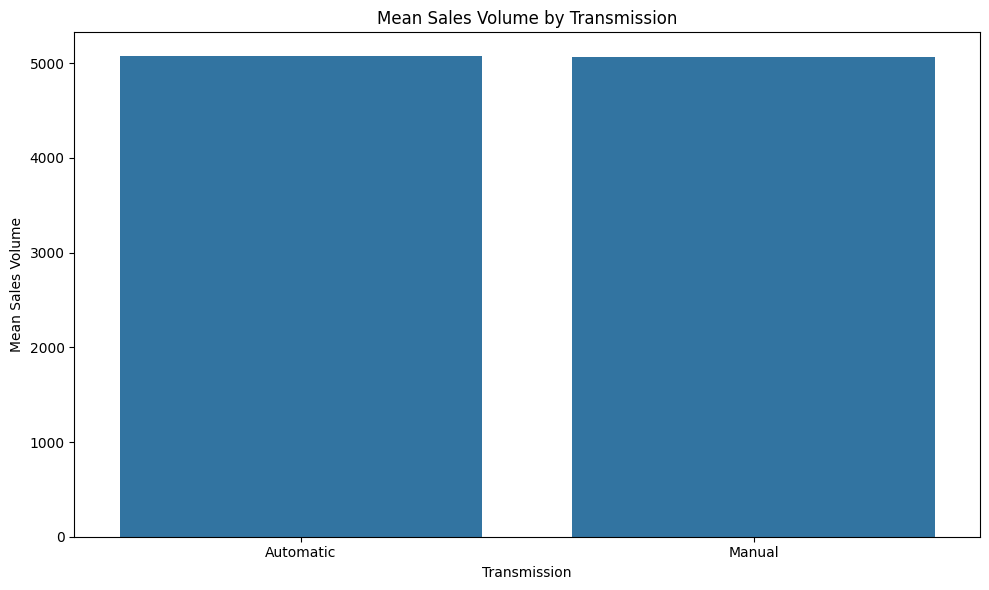

In [15]:
#  mean sales volume by Region
mean_sales_by_region = df.groupby('Region')['Sales_Volume'].mean().reset_index()

#  bar plot of mean sales volume by Region
plt.figure(figsize=(15, 7))
sns.barplot(x='Region', y='Sales_Volume', data=mean_sales_by_region)
plt.xticks(rotation=90)
plt.title('Mean Sales Volume by Region')
plt.xlabel('Region')
plt.ylabel('Mean Sales Volume')
plt.tight_layout()
plt.show()

#  mean sales volume by Transmission
mean_sales_by_transmission = df.groupby('Transmission')['Sales_Volume'].mean().reset_index()

#  bar plot of mean sales volume by Transmission
plt.figure(figsize=(10, 6))
sns.barplot(x='Transmission', y='Sales_Volume', data=mean_sales_by_transmission)
plt.title('Mean Sales Volume by Transmission')
plt.xlabel('Transmission')
plt.ylabel('Mean Sales Volume')
plt.tight_layout()
plt.show()

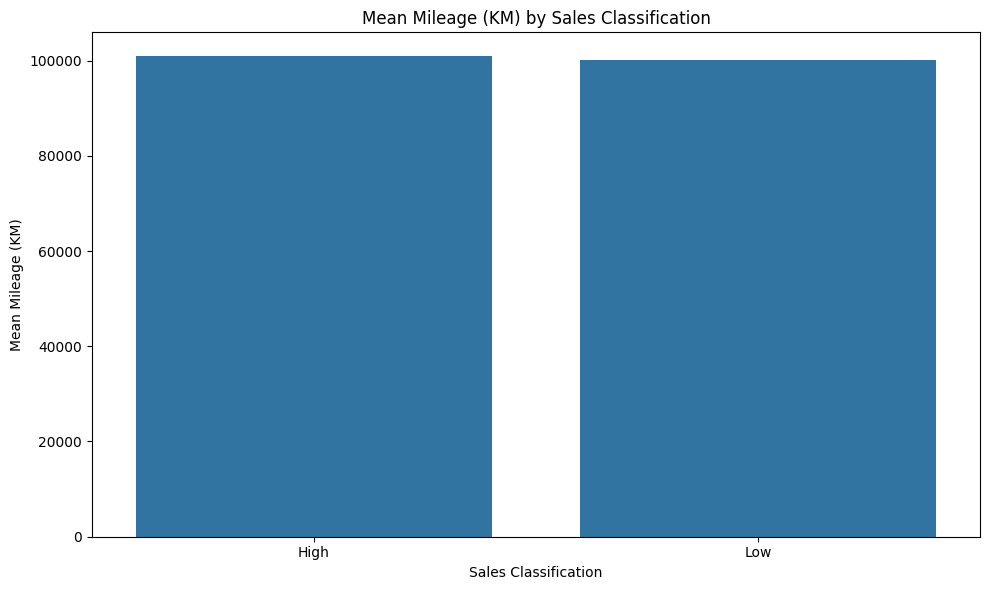

In [17]:
# mean Mileage_KM by Sales_Classification
mean_mileage_by_classification = df.groupby('Sales_Classification')['Mileage_KM'].mean().reset_index()

#  a bar plot of mean Mileage_KM by Sales_Classification (column chart)
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales_Classification', y='Mileage_KM', data=mean_mileage_by_classification)
plt.title('Mean Mileage (KM) by Sales Classification')
plt.xlabel('Sales Classification')
plt.ylabel('Mean Mileage (KM)')
plt.tight_layout()
plt.show()